### Análisis de condiciones climatológicas entre estados

Se analizará las diferencias climatológicas entre estados y se verá si existe alguna diferencia significativa entre el promedio de hlnad y hcrop de ambos estados.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
estados = {'AZ':'AZ',
        'Az':'AZ',
        'NM':'NM' }

In [63]:
df = pd.read_csv('data/dataset_preprocessed.csv')

In [64]:
df['estado'] = df['estado'].apply(lambda x : estados[x])

In [94]:
df_AZ = df[df['estado'] == 'AZ']
df_NM = df[df['estado'] == 'NM']

In [65]:
df_clima = df[['estado','ppanual17','tmedia17', 'altitud']]

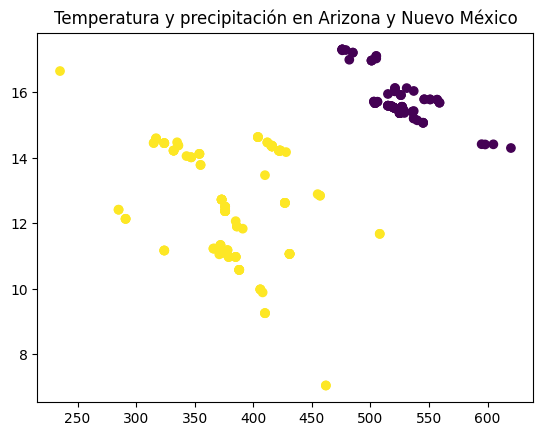

In [66]:
plt.scatter(df_clima['ppanual17'],df_clima['tmedia17'], c = df_clima['estado'].apply(lambda x: int(x=='NM')))
plt.title('Temperatura y precipitación en Arizona y Nuevo México')
plt.show()

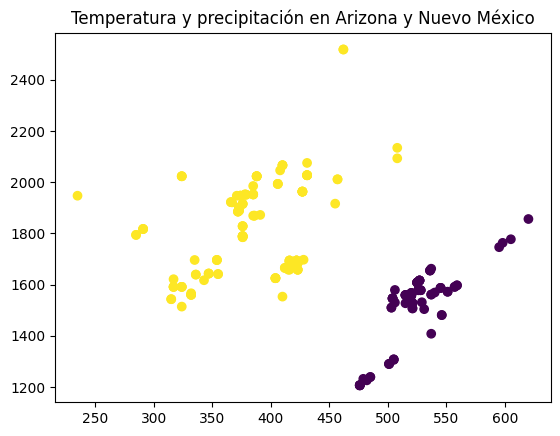

In [67]:
plt.scatter(df_clima['ppanual17'],df_clima['altitud'], c = df_clima['estado'].apply(lambda x: int(x=='NM')))
plt.title('Temperatura y precipitación en Arizona y Nuevo México')
plt.show()

Aparentemente, ambos estados se pueden diferenciar bien utilizando las tres variables anteriores. Realizaremos pruebas entre las medias de estas tres variables.

In [68]:
df_clima['estado'].value_counts()

estado
NM    135
AZ     85
Name: count, dtype: int64

Aproximadamente el 60% de las entradas pertenecen a Nuevo México y el otro 40% a Arizona. 

In [70]:
df_clima_AZ = df_clima[df_clima['estado'] == 'AZ']
df_clima_NM = df_clima[df_clima['estado'] == 'NM']

Utilizaremos pruebas de permutación para las 3 variables entre los dos estados. En este caso, la hipótesis nula es que las muestras de ambos estados provienen de la misma distribución.

In [78]:
from scipy.stats import permutation_test

def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [81]:
import numpy as np

In [116]:
variables = ['tmedia17', 'ppanual17', 'altitud']

for variable in variables:
    print(f"La media de {variable} para AZ es {np.mean(df_clima_AZ[variable], 0)}, para NM es {np.mean(df_clima_NM[variable], 0)}")
    if(np.mean(df_clima_AZ[variable]) - np.mean(df_clima_NM[variable])>0):
        print(f"El p-valor de la prueba de permutación es: {(permutation_test((df_clima_AZ[variable], df_clima_NM[variable]), statistic, vectorized=True, 
        n_resamples=100, alternative='greater')).pvalue}")
    else: 
        print(f"El p-valor de la prueba de permutación es: {(permutation_test((df_clima_AZ[variable], df_clima_NM[variable]), statistic, vectorized=True, 
        n_resamples=100, alternative='less')).pvalue}")
    print("")

La media de tmedia17 para AZ es 15.825294119764706, para NM es 12.64453703148889
El p-valor de la prueba de permutación es: 0.009900990099009901

La media de ppanual17 para AZ es 523.6470588235294, para NM es 382.47407407407405
El p-valor de la prueba de permutación es: 0.009900990099009901

La media de altitud para AZ es 1520.7411764705882, para NM es 1826.5185185185185
El p-valor de la prueba de permutación es: 0.009900990099009901



Ante esto, tenemos evidencia de que tanto la media de la temperatura, precipitación y altitud de las islas del cielo de ambos estados de las cuales se obtuvieron las muestras son distintas. Así, en general, podríamos considerar que en las muestras tenemos mayor temperatura media y precipitacion en Arizona, y mayor altitud en Nuevo México.

In [97]:
indices = ['hcrop', 'hland']

for indice in indices:
    print(f"La media de {indice} para AZ es {np.mean(df_AZ[indice], 0)}, para NM es {np.mean(df_NM[indice], 0)}")


La media de hcrop para AZ es 0.7376308569529412, para NM es 0.47692075225925934
La media de hland para AZ es 1.2938096282117648, para NM es 0.8871449856962963


Ambos índices presentan mayor media en Arizona.